In [5]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [6]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

           ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

           ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

           ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

           ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]


In [7]:
#  one-hot-encoding
te = TransactionEncoder()
te_ = te.fit(dataset).transform(dataset)
# Creating a  DataFrame 
df = pd.DataFrame(te_, columns=te.columns_)
df


,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [8]:
apriori(df, min_support=0.6)


,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


### support

In [9]:

items= apriori(df, min_support=0.6, use_colnames=True)
items


,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Pants, Skirt)"


### confience

In [10]:
association_rules(items, metric="confidence", min_threshold=0.7)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf


### lift

In [12]:
association_rules(items, metric="lift", min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


### the bigger dataset !

In [70]:
df = pd.read_csv('Market_Basket_Optimisation.csv', header=None)


In [71]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### visualization

In [89]:
df_ = pd.DataFrame()
for i in range(len(df.columns)):
    df_ = df_.append(df[i].value_counts())


In [93]:
import matplotlib.pyplot as plt

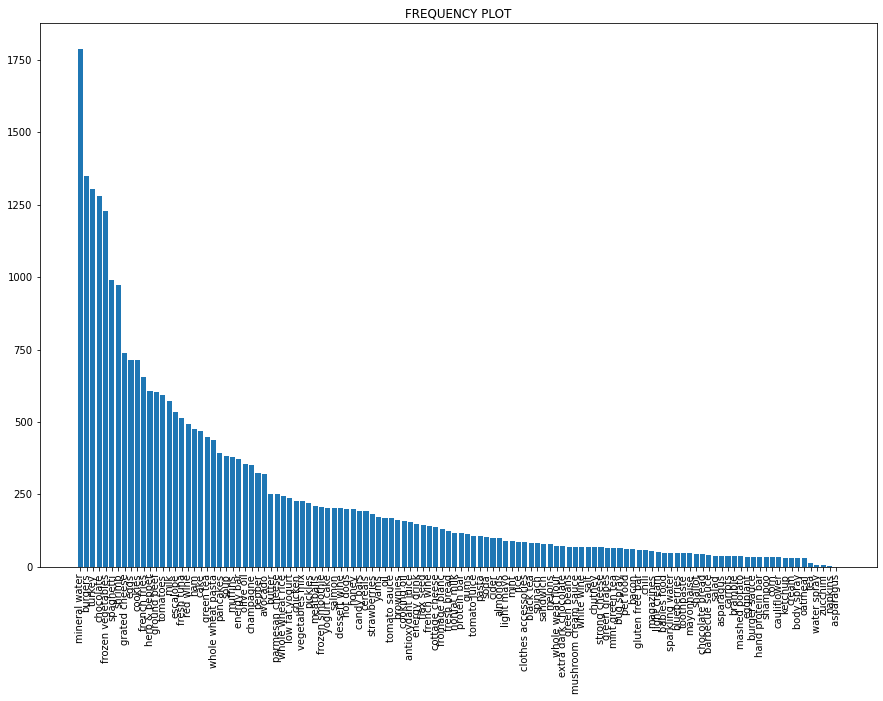

In [100]:
plt.figure(figsize=(15, 10))
plt.title("FREQUENCY PLOT")

plt.bar(df_.columns,df_.sum().sort_values(ascending=False))
plt.xticks(rotation='vertical')
plt.show()


In [101]:
import csv

with open('Market_Basket_Optimisation.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)


In [102]:
data

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [103]:
te = TransactionEncoder()
te_ = te.fit(data).transform(data)
# Creating a  DataFrame
df = pd.DataFrame(te_, columns=te.columns_)
df


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [104]:
apriori(df, min_support=0.01)


,support,itemsets
0,0.020397,(1)
1,0.033329,(4)
2,0.010799,(7)
3,0.014265,(8)
4,0.011465,(10)
...,...,...
252,0.011065,"(72, 71, 55)"
253,0.017064,"(72, 100, 55)"
254,0.015731,"(72, 100, 71)"
255,0.010265,"(72, 81, 100)"


### apriori
### sopport

In [56]:
items = apriori(df, min_support=0.01, use_colnames=True)
items


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(mineral water, milk, ground beef)"
253,0.017064,"(mineral water, ground beef, spaghetti)"
254,0.015731,"(mineral water, milk, spaghetti)"
255,0.010265,"(olive oil, mineral water, spaghetti)"


### confidence

In [63]:

association_rules(items, metric="confidence", min_threshold=0.4)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
1,(olive oil),(mineral water),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962
2,(salmon),(mineral water),0.042528,0.238368,0.017064,0.401254,1.683336,0.006927,1.272045
3,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
4,"(chocolate, eggs)",(mineral water),0.033196,0.238368,0.013465,0.405622,1.701663,0.005552,1.281394
5,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937
6,"(chocolate, milk)",(mineral water),0.032129,0.238368,0.013998,0.435685,1.827780,0.006340,1.349656
7,"(chocolate, spaghetti)",(mineral water),0.039195,0.238368,0.015865,0.404762,1.698053,0.006522,1.279541
8,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848
9,"(eggs, milk)",(mineral water),0.030796,0.238368,0.013065,0.424242,1.779778,0.005724,1.322834


### lift

In [64]:
association_rules(items, metric="lift", min_threshold=1.25)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,0.003654,1.016113
1,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147
2,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,0.004398,1.058080
3,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,0.004398,1.063198
4,(eggs),(burgers),0.179709,0.087188,0.028796,0.160237,1.837830,0.013128,1.086988
...,...,...,...,...,...,...,...,...,...
329,"(mineral water, pancakes)",(spaghetti),0.033729,0.174110,0.011465,0.339921,1.952333,0.005593,1.251198
330,"(spaghetti, pancakes)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557
331,(mineral water),"(spaghetti, pancakes)",0.238368,0.025197,0.011465,0.048098,1.908923,0.005459,1.024059
332,(spaghetti),"(mineral water, pancakes)",0.174110,0.033729,0.011465,0.065850,1.952333,0.005593,1.034385
